In [86]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ISLP.models import sklearn_sm
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler

In [87]:
#Cleaning/Placing all Data together

In [88]:
df_health = pd.read_csv('https://raw.githubusercontent.com/b-pinter/COVID/main/data-QOKUW.csv')
df_income = pd.read_csv('https://raw.githubusercontent.com/b-pinter/COVID/main/average-income-by-state-2024.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/b-pinter/Spring-2024-Research/main/deaths_total.csv')
df_density = pd.read_csv('https://raw.githubusercontent.com/b-pinter/Spring-2024-Research/main/united-states-by-density-2024.csv')
df_total_population = pd.read_csv('https://raw.githubusercontent.com/b-pinter/Spring-2024-Research/main/State_Populations.csv')
df_poverty = pd.read_csv('https://raw.githubusercontent.com/b-pinter/Spring-2024-Research/main/Percentage-in-Poverty.csv')

In [89]:
test_1 = df_deaths.drop('Unnamed: 0',axis = 1)
test_2 = df_deaths.drop('Unnamed: 3', axis = 1)
df_deaths = test_2.drop('Unnamed: 4',axis = 1)

In [90]:
df_master = df_deaths.merge(df_health, on = 'State')
df_master = df_master.merge(df_income, on = 'State')
df_master = df_master.merge(df_density, on = 'State')
df_master = df_master.merge(df_total_population, on = 'State')
df_master = df_master.merge(df_poverty, on = 'State')

In [91]:
df_master.head()

,Unnamed: 0,State,Deaths,Rank,Disease Risk Factors & Prevalence Score¹,Substance Abuse Score²,Lifestyle Habits & Health Outlook Score³,Overall Score,AverageIncomePerCapita2022,AverageIncomePerCapita2021,densityMi,population,TotalArea,Pop. 2022,PercentInPoverty
0,NaN,California,101159,38,27.91,56.15,2.13,30.74,77339.0,76800.0,249.64706,38889770.0,163696.0,39029342,12.3
1,NaN,Texas,93390,24,54.10,0.00,51.02,45.76,61985.0,59802.0,118.57948,30976754.0,268596.0,30029572,14.2
2,NaN,Florida,86850,39,25.24,33.78,32.00,29.35,63597.0,62136.0,428.45559,22975931.0,65758.0,22244823,13.2
3,NaN,New York,77157,41,15.32,47.49,19.27,23.04,78089.0,76753.0,413.13143,19469232.0,54555.0,19677151,14.0
4,NaN,Pennsylvania,50398,26,33.76,53.82,49.02,42.97,65167.0,64042.0,289.45925,12951275.0,46054.0,12972008,12.0


In [92]:
df_master.drop(['Unnamed: 0','population','TotalArea','AverageIncomePerCapita2021','Rank'],axis=1,inplace=True)

In [93]:
df_master['Deaths Per Capita'] = df_master['Deaths']/df_master['Pop. 2022']
numerical_deaths = pd.to_numeric(df_master['Deaths'])
df_master['Deaths'] = numerical_deaths

In [94]:
df_master.head()

,State,Deaths,Disease Risk Factors & Prevalence Score¹,Substance Abuse Score²,Lifestyle Habits & Health Outlook Score³,Overall Score,AverageIncomePerCapita2022,densityMi,Pop. 2022,PercentInPoverty,Deaths Per Capita
0,California,101159,27.91,56.15,2.13,30.74,77339.0,249.64706,39029342,12.3,0.002592
1,Texas,93390,54.10,0.00,51.02,45.76,61985.0,118.57948,30029572,14.2,0.003110
2,Florida,86850,25.24,33.78,32.00,29.35,63597.0,428.45559,22244823,13.2,0.003904
3,New York,77157,15.32,47.49,19.27,23.04,78089.0,413.13143,19677151,14.0,0.003921
4,Pennsylvania,50398,33.76,53.82,49.02,42.97,65167.0,289.45925,12972008,12.0,0.003885


In [95]:
df_master.columns

Index(['State', 'Deaths', 'Disease Risk Factors & Prevalence Score¹',
       'Substance Abuse Score²', 'Lifestyle Habits & Health Outlook Score³',
       'Overall Score', 'AverageIncomePerCapita2022', 'densityMi', 'Pop. 2022',
       'PercentInPoverty', 'Deaths Per Capita'],
      dtype='object')

In [96]:
y = df_master['Deaths Per Capita']

In [97]:
#Multiple Linear Regression - US National
#Fig 2
X = MS(['Overall Score','AverageIncomePerCapita2022','densityMi','Pop. 2022','PercentInPoverty']).fit_transform(df_master)
model1 = sm.OLS(y, X)
results = model1.fit()
summarize(results)
#Fig 3

,coef,std err,t,P>|t|
intercept,-5.000000e-04,1.000000e-03,-0.397,0.693
Overall Score,1.429000e-05,5.840000e-06,2.449,0.018
AverageIncomePerCapita2022,1.252000e-08,1.590000e-08,0.785,0.436
densityMi,8.774000e-07,3.490000e-07,2.516,0.016
Pop. 2022,-7.762000e-14,1.190000e-11,-0.007,0.995
PercentInPoverty,2.000000e-04,5.570000e-05,3.095,0.003


In [98]:
#Fig. 4
results.rsquared

0.6309046645035186

In [128]:
#Creation of a Ridge Regression with prediction for Deaths Per Capita
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(X)
X_scale = scaler.transform(X)

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(np.asarray(X_scale),
                            y,
                            test_size=0.3)
alphas = 10**np.linspace(10,-2,100)*0.5

In [129]:
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [130]:
#US National Ridge Regression
ridge = Ridge()
coefs = []
MSEs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test)
    MSEs.append(mean_squared_error(y_test, pred))

Text(0, 0.5, 'MSE')

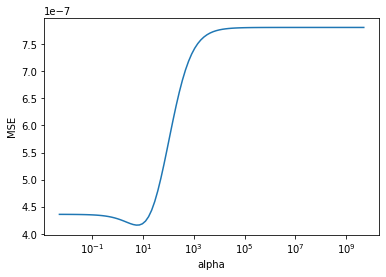

In [131]:
plt.plot(alphas, MSEs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')

In [154]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_scale, y)
print(ridgecv.alpha_)

7.087370814634009


In [155]:
best_score = ridgecv.best_score_
best_score

-3.4112482247144376e-07

In [156]:
#R-Squared Score for National Model
print(ridgecv.score(X_scale,y))

0.6208476863994253


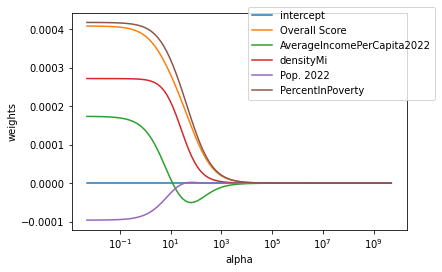

In [135]:
plt.plot(alphas, coefs, label = X.columns)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [136]:
Northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania","Delaware","Maryland"]
Midwest = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"]
South =  ["Alabama", "Arkansas",  "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", "Virginia", "West Virginia"]
West = ["Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"]

In [137]:
#Fig. 1
df_northeast = df_master[df_master['State'].isin(Northeast)]
df_midwest = df_master[df_master['State'].isin(Midwest)]
df_south = df_master[df_master['State'].isin(South)]
df_west = df_master[df_master['State'].isin(West)]

In [138]:
#Bootstraping
df_northeast = df_master.sample(n = 50, replace = True)
df_midwest = df_master.sample(n = 50, replace = True)
df_south = df_master.sample(n = 50, replace = True)
df_west = df_master.sample(n = 50, replace = True)

In [176]:
y1 = df_northeast['Deaths Per Capita']
y2 = df_midwest['Deaths Per Capita']
y3 = df_south['Deaths Per Capita']
y4 = df_west['Deaths Per Capita']

In [159]:

X1 = MS(['Overall Score','AverageIncomePerCapita2022','densityMi','Pop. 2022','PercentInPoverty']).fit_transform(df_northeast)
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
summarize(results1)
#Multiple Linear Regression - US Northeast

,coef,std err,t,P>|t|
intercept,-1.800000e-03,1.000000e-03,-1.738,0.089
Overall Score,1.705000e-05,4.650000e-06,3.664,0.001
AverageIncomePerCapita2022,2.576000e-08,1.190000e-08,2.159,0.036
densityMi,6.735000e-07,2.800000e-07,2.408,0.020
Pop. 2022,-1.894000e-12,1.030000e-11,-0.183,0.855
PercentInPoverty,2.000000e-04,4.760000e-05,4.396,0.000


In [160]:
#Northeast R-Squared
results1.rsquared

0.7208621754791624

In [161]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(X1)
X_scale1 = scaler.transform(X1)

(X_train1,
 X_test1,
 y_train1,
 y_test1) = train_test_split(np.asarray(X_scale1),
                            y1,
                            test_size=0.3)

In [162]:
ridge = Ridge()
coefs = []
MSEs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train1, y_train1)
    coefs.append(ridge.coef_)
    pred1 = ridge.predict(X_test1)
    MSEs.append(mean_squared_error(y_test1, pred1))

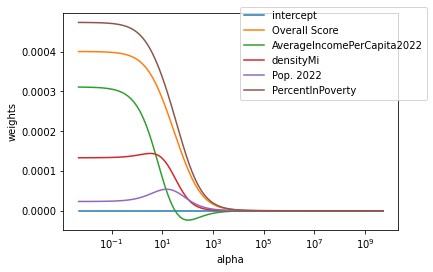

In [163]:
plt.plot(alphas, coefs, label = X1.columns)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [164]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_scale1, y1)
print(ridgecv.alpha_)

3.0679536367065814


In [165]:
print(ridgecv.score(X_scale1,y1))

0.7170254013298458


In [167]:

X2 = MS(['Overall Score','AverageIncomePerCapita2022','densityMi','Pop. 2022','PercentInPoverty']).fit_transform(df_midwest)
model1 = sm.OLS(y2, X2)
results2 = model1.fit()
summarize(results2)
#Multiple Linear Regression - US Midwest

,coef,std err,t,P>|t|
intercept,-1.600000e-03,1.000000e-03,-1.307,0.198
Overall Score,2.191000e-05,4.720000e-06,4.640,0.000
AverageIncomePerCapita2022,2.376000e-08,1.380000e-08,1.722,0.092
densityMi,8.947000e-07,3.090000e-07,2.892,0.006
Pop. 2022,-3.753000e-12,1.090000e-11,-0.345,0.731
PercentInPoverty,2.000000e-04,5.410000e-05,3.132,0.003


In [168]:
#Midwest R-Squared
results2.rsquared

0.7264482354618709

In [169]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(X2)
X_scale2 = scaler.transform(X2)

(X_train2,
 X_test2,
 y_train2,
 y_test2) = train_test_split(np.asarray(X_scale2),
                            y2,
                            test_size=0.3)

In [170]:
ridge = Ridge()
coefs = []
MSEs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train2, y_train2)
    coefs.append(ridge.coef_)
    pred2 = ridge.predict(X_test2)
    MSEs.append(mean_squared_error(y_test2, pred2))

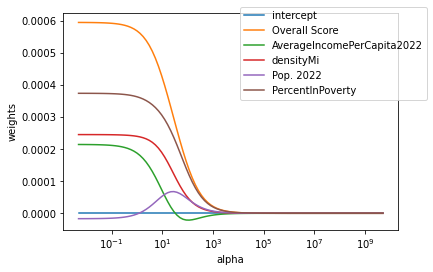

In [171]:
plt.plot(alphas, coefs, label = X2.columns)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [172]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_scale2, y2)
print(ridgecv.alpha_)

2.320794416806386


In [173]:
print(ridgecv.score(X_scale2,y2))

0.7247142592847244


In [177]:

X3 = MS(['Overall Score','AverageIncomePerCapita2022','densityMi','Pop. 2022','PercentInPoverty']).fit_transform(df_south)
model1 = sm.OLS(y3, X3)
results3 = model1.fit()
summarize(results3)
#Multiple Linear Regression - US South

,coef,std err,t,P>|t|
intercept,2.000000e-04,1.000000e-03,0.177,0.860
Overall Score,2.843000e-05,6.010000e-06,4.734,0.000
AverageIncomePerCapita2022,1.364000e-08,1.550000e-08,0.882,0.383
densityMi,1.127000e-06,2.670000e-07,4.217,0.000
Pop. 2022,-5.012000e-12,1.050000e-11,-0.478,0.635
PercentInPoverty,4.973000e-05,6.040000e-05,0.824,0.414


In [178]:
#Southern US R-Squared
results3.rsquared

0.6519360637411082

In [179]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(X3)
X_scale3 = scaler.transform(X3)

(X_train3,
 X_test3,
 y_train3,
 y_test3) = train_test_split(np.asarray(X_scale3),
                            y3,
                            test_size=0.3)

In [180]:
ridge = Ridge()
coefs = []
MSEs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train3, y_train3)
    coefs.append(ridge.coef_)
    pred3 = ridge.predict(X_test3)
    MSEs.append(mean_squared_error(y_test3, pred3))

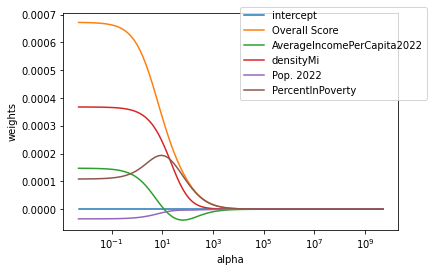

In [181]:
plt.plot(alphas, coefs, label = X3.columns)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [182]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_scale3, y3)
print(ridgecv.alpha_)

0.08148754173103201


In [183]:
print(ridgecv.score(X_scale3,y3))

0.6519263289290407


In [184]:

X4 = MS(['Overall Score','AverageIncomePerCapita2022','densityMi','Pop. 2022','PercentInPoverty']).fit_transform(df_west)
model1 = sm.OLS(y4, X4)
results4 = model1.fit()
summarize(results4)
#Multiple Linear Regression - US West

,coef,std err,t,P>|t|
intercept,-1.000000e-03,2.000000e-03,-0.599,0.552
Overall Score,1.139000e-05,6.240000e-06,1.824,0.075
AverageIncomePerCapita2022,1.354000e-08,1.590000e-08,0.853,0.398
densityMi,7.476000e-07,3.900000e-07,1.918,0.062
Pop. 2022,-7.281000e-12,1.370000e-11,-0.531,0.598
PercentInPoverty,2.000000e-04,8.610000e-05,2.537,0.015


In [185]:
#Western US R-Squared
results4.rsquared

0.6009737442149372

In [186]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(X4)
X_scale4 = scaler.transform(X4)

(X_train4,
 X_test4,
 y_train4,
 y_test4) = train_test_split(np.asarray(X_scale4),
                            y4,
                            test_size=0.3)

In [187]:
ridge = Ridge()
coefs = []
MSEs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train4, y_train4)
    coefs.append(ridge.coef_)
    pred4 = ridge.predict(X_test4)
    MSEs.append(mean_squared_error(y_test4, pred4))

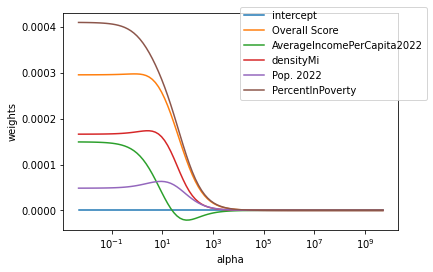

In [188]:
plt.plot(alphas, coefs, label = X4.columns)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [189]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_scale4, y4)
print(ridgecv.alpha_)

5.361336110051605


In [190]:
print(ridgecv.score(X_scale4,y4))

0.5944346147124384
